Software for managing and analysing light curves of variable stars, coming from different surveys.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.timeseries import LombScargle

In [2]:
plot_filter_labels = ['u', 'g', 'r', 'i', 'z', 'y']
plot_filter_colors = {'u': '#56b4e9', 'g': '#008060', 'r': '#ff4000',
                      'i': '#850000', 'z': '#6600cc', 'y': '#000000'}
plot_filter_symbols = {'u': 'o', 'g': '^', 'r': 'v', 'i': 's', 'z': '*', 'y': 'p'}

In [3]:
# Read LC datasets
lcDatasets = {}
lcDatasets['lsst'] = pd.read_pickle(os.path.join('data','lsst_RRLyr.pkl'))
lcDatasets['kepler'] = pd.read_csv(os.path.join('data','kepler_RRLyr.csv'))

In [4]:
# Inspect datasets
lcDatasets['lsst'].head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [5]:
lcDatasets['lsst'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   band         11177 non-null  object 
 1   ccdVisitId   11177 non-null  int64  
 2   coord_ra     11177 non-null  float64
 3   coord_dec    11177 non-null  float64
 4   objectId     11177 non-null  int64  
 5   psfFlux      11177 non-null  float64
 6   psfFluxErr   11177 non-null  float64
 7   psfMag       10944 non-null  float64
 8   ccdVisitId2  11177 non-null  int64  
 9   band2        11177 non-null  object 
 10  expMidptMJD  11177 non-null  float64
 11  zeroPoint    11177 non-null  float32
dtypes: float32(1), float64(6), int64(3), object(2)
memory usage: 1004.3+ KB


In [6]:
lcDatasets['kepler'].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [7]:
lcDatasets['kepler'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             93487 non-null  float64
 1   flux             93218 non-null  float64
 2   flux_err         93218 non-null  float64
 3   quality          93487 non-null  int64  
 4   timecorr         93487 non-null  float64
 5   centroid_col     93264 non-null  float64
 6   centroid_row     93264 non-null  float64
 7   cadenceno        93487 non-null  int64  
 8   sap_flux         93264 non-null  float64
 9   sap_flux_err     93264 non-null  float64
 10  sap_bkg          93264 non-null  float64
 11  sap_bkg_err      93264 non-null  float64
 12  pdcsap_flux      93218 non-null  float64
 13  pdcsap_flux_err  93218 non-null  float64
 14  sap_quality      93487 non-null  int64  
 15  psf_centr1       0 non-null      float64
 16  psf_centr1_err   0 non-null      float64
 17  psf_centr2  

### Test period searching and visualization for LSST

In [8]:
len(lcDatasets['lsst']['objectId'].unique())

25

In [9]:
LC = lcDatasets['lsst']['objectId'].unique()[7]
LC = lcDatasets['lsst'][lcDatasets['lsst']['objectId']==LC]

In [10]:
bands = {}
for filter in plot_filter_labels:
    bands[filter] = (LC['band'] == filter)

In [11]:
len(LC)

421

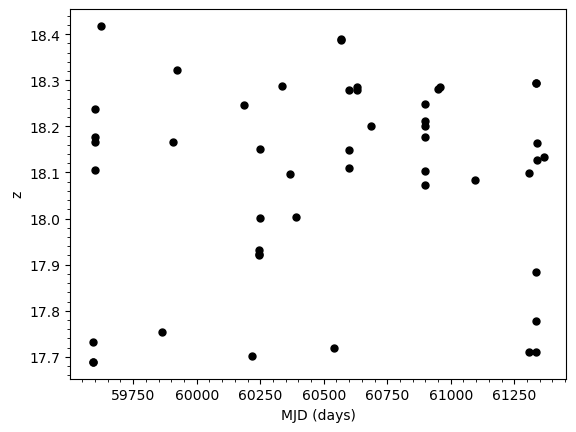

In [12]:
b = 'z'
plt.plot(LC[bands[b]]['expMidptMJD'].to_numpy(), 
         LC[bands[b]]['psfMag'].to_numpy(),'k.', ms=10)
plt.minorticks_on()
plt.xlabel('MJD (days)')
plt.ylabel(b)
plt.show()

In [13]:
mjd_days = {}
mags = {}
for filter in plot_filter_labels:
    mjd_days[filter] = np.array(LC[bands[filter]]['expMidptMJD']) * u.day
    mags[filter] = np.array(LC[bands[filter]]['psfMag'])

In [14]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [15]:
frequency = {}
power = {}
for filter in plot_filter_labels:
    frequency[filter], power[filter] =\
        LombScargle(mjd_days[filter], mags[filter]).autopower(minimum_frequency=min_freq_search,
                                                              maximum_frequency=max_freq_search)

In [16]:
all_peak_freqs = []

for filter in plot_filter_labels:
    # find the index with maximum power (= peakbin)
    peakbin = np.argmax(power[filter])

    # Store the frequency corresponding to the peak power in each filter (band)
    all_peak_freqs.append(frequency[filter][peakbin].value)

# Convert the frequencies from a list to and array:
all_peak_freqs = np.array(all_peak_freqs)

# Calculate the mean of the "best-fit" frequencies:
mean_peak_freq = np.mean(all_peak_freqs)

print('Mean frequency:', mean_peak_freq)
print('Mean period:', 1.0/mean_peak_freq, ' days')
print('\nugrizy frequency results:\n', all_peak_freqs)


Mean frequency: 2.178158712764198
Mean period: 0.45910336750940767  days

ugrizy frequency results:
 [2.17807944 2.17816158 2.17813256 2.17819998 2.178213   2.17816572]


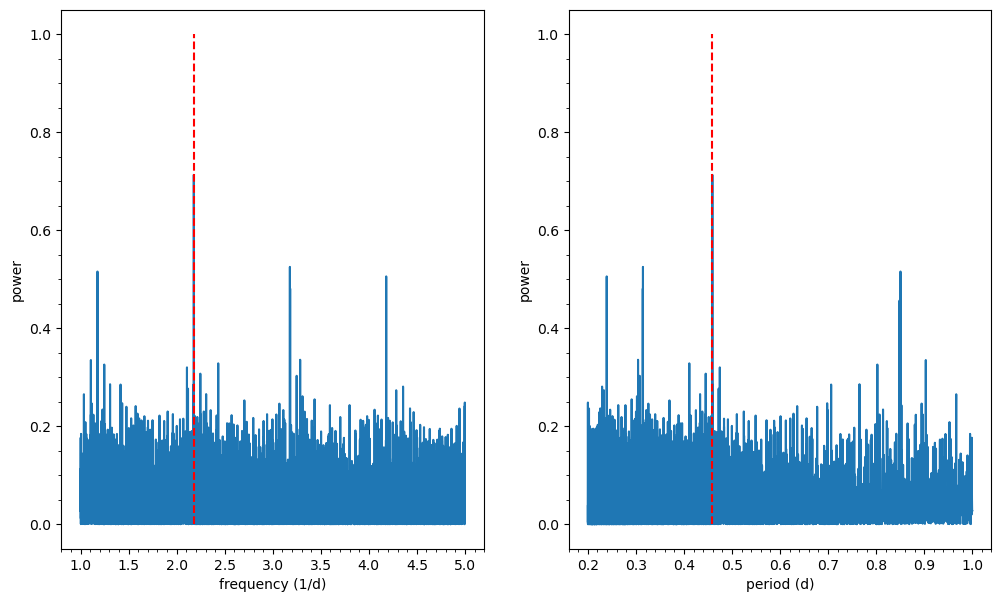

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(frequency['r'], power['r'])
plt.vlines(mean_peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('frequency (1/d)')
plt.ylabel('power')

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / frequency['r'], power['r'])
plt.vlines(1/mean_peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('period (d)')
plt.ylabel('power')
plt.show()

In [18]:
best_period = 1/2.1781

In [19]:
mjd_norm = {}
phase = {}

# Number of elapsed periods since the first measurement:
t0 = np.min(mjd_days['g'].value)

for filter in plot_filter_labels:
    mjd_norm[filter] = (mjd_days[filter].value - t0) / best_period

    # Calculate phase by using the modulus function:
    phase[filter] = np.mod(mjd_norm[filter], 1.0)

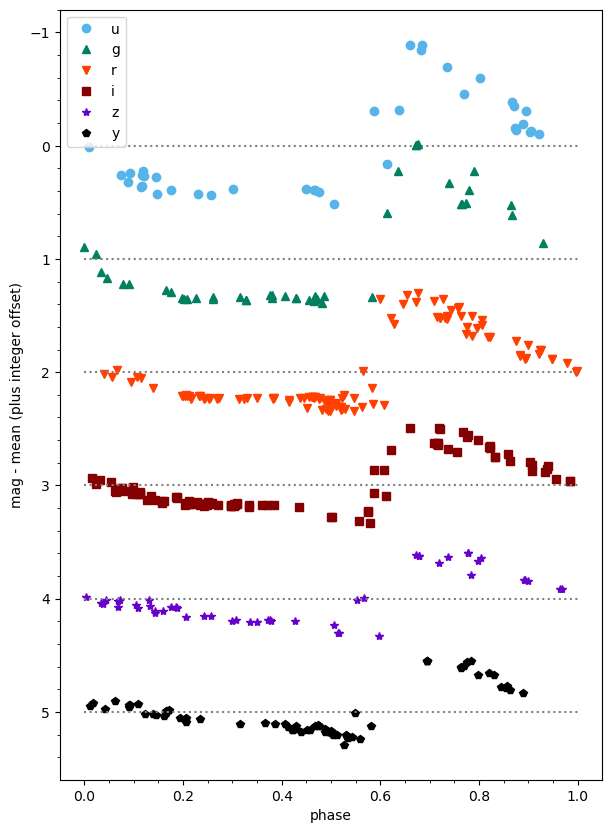

In [20]:
fig = plt.figure(figsize=(7, 10))     # create a matplotlib.pyplot figure

i = 0

for filter in plot_filter_labels:
    plt.plot(phase[filter], mags[filter]-np.mean(mags[filter]) + i,
             plot_filter_symbols[filter],
             color=plot_filter_colors[filter], label=filter)
    plt.hlines(i, 0, 1, linestyle=':', color='Gray')
    i += 1

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('phase')
plt.ylabel('mag - mean (plus integer offset)')
plt.minorticks_on()
plt.show()

### Test period searching and visualization for Kepler

In [21]:
len(lcDatasets['kepler'])

93487

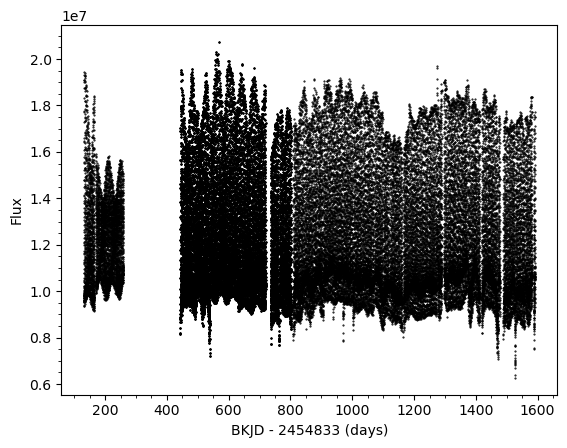

In [22]:
plt.plot(list(lcDatasets['kepler']['time']), list(lcDatasets['kepler']['flux']),'k.', ms=1)
plt.minorticks_on()
plt.xlabel('BKJD - 2454833 (days)')
plt.ylabel('Flux')
plt.show()

In [139]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [140]:
frequency = []
power = []

#Filter NaNs from flux 
bkjd_days = np.array(lcDatasets['kepler']['time'][~np.isnan(lcDatasets['kepler']['flux'])]) * u.day
flux = np.array(lcDatasets['kepler']['flux'][~np.isnan(lcDatasets['kepler']['flux'])])

frequency, power = LombScargle(bkjd_days, flux).autopower(minimum_frequency=min_freq_search,
                                                              maximum_frequency=max_freq_search)

In [141]:
# find the index with maximum power (= peakbin)
peakbin = np.argmax(power)

# Store the frequency corresponding to the peak power in each filter (band)
peak_freq = frequency[peakbin].value

print('Best frequency:', peak_freq)
print('Best period:', 1.0/peak_freq, ' days')


Best frequency: 1.7642400770638882
Best period: 0.5668162814123552  days


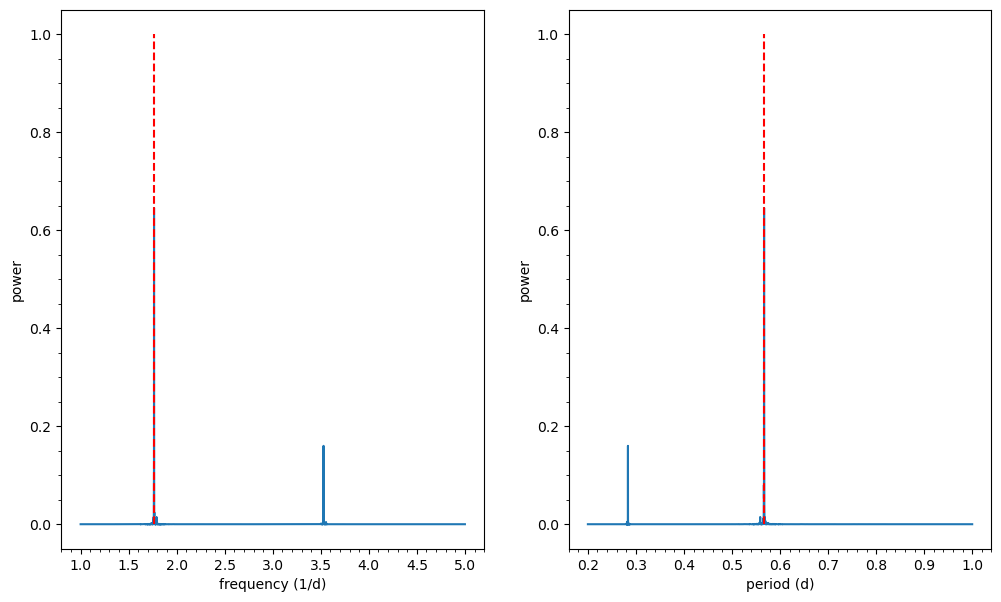

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(frequency, power)
plt.vlines(peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('frequency (1/d)')
plt.ylabel('power')

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / frequency, power)
plt.vlines(1/peak_freq, 0, 1, linestyle='--', color='red')
plt.minorticks_on()
plt.xlabel('period (d)')
plt.ylabel('power')
plt.show()

In [27]:
best_period = 1 / peak_freq

In [28]:
# Number of elapsed periods since the first measurement:
t0 = np.min(bkjd_days.value)

bkjd_norm = (bkjd_days.value - t0) / best_period

# Calculate phase by using the modulus function:
phase = np.mod(bkjd_norm, 1.0)

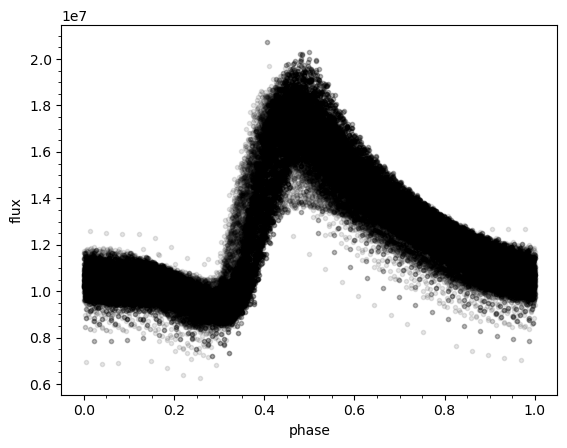

In [29]:
fig = plt.figure()     # create a matplotlib.pyplot figure

plt.scatter(phase, flux, marker='.', c='k', alpha=0.1)

plt.xlabel('phase')
plt.ylabel('flux')
plt.minorticks_on()
plt.show()

## Ideas for the software project

- "models.py":
 * def load_dataset
 * def mean_mag
 * def median_mag
 * def num_outliers
 * def calc_period
- "view.py"
 * def plot_unfolded
 * def plot_periodogram
 * def plot_folded
- tests
 * what to test for corner/edge cases? https://us04web.zoom.us/j/73861640362?pwd=fafZGzeZxbIrTKwIygayZDVY4un7Nx.1
 

- class Lightcurve
 * self.ObjId
 * self.lc
 * self.bestPeriod
 * 